<a href="https://colab.research.google.com/github/ale29ruf/Progetto_Data_Mining/blob/main/ProgettoACI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Parte in cui descriviamo il dataset, le features e il loro significato, il numero di istanze.

Il obiettivo in termini predittivi è determinare se una persona guadagna oltre $50K all'anno.

Come prima operazione importiamo il dataset.

In [45]:
from sklearn.model_selection
from sklearn.datasets
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving adult.csv to adult (1).csv


In [46]:
# Supponiamo che il file caricato si chiami 'nomeFile.csv' (controllare nella sezione File a sinistra)
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Visualizziamo la distribuzione dei valori per alcune feature.

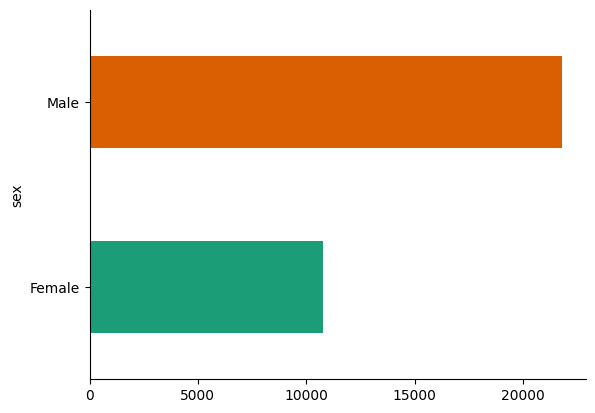

In [47]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sex').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

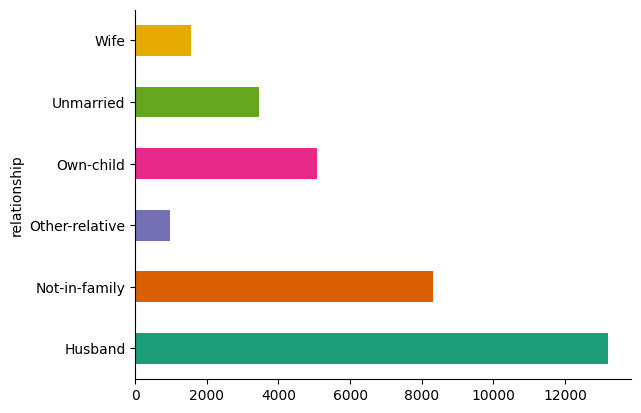

In [48]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('relationship').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

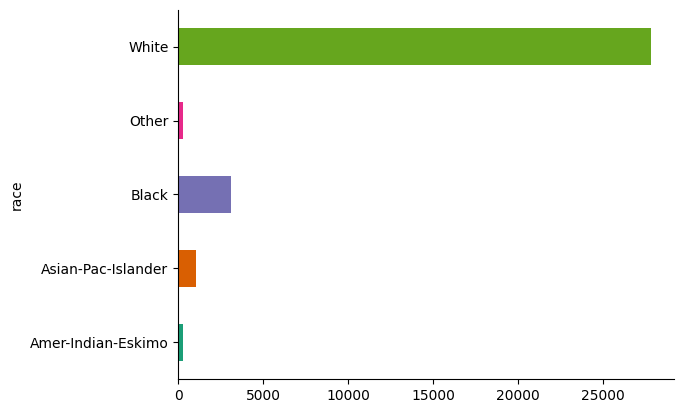

In [49]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('race').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

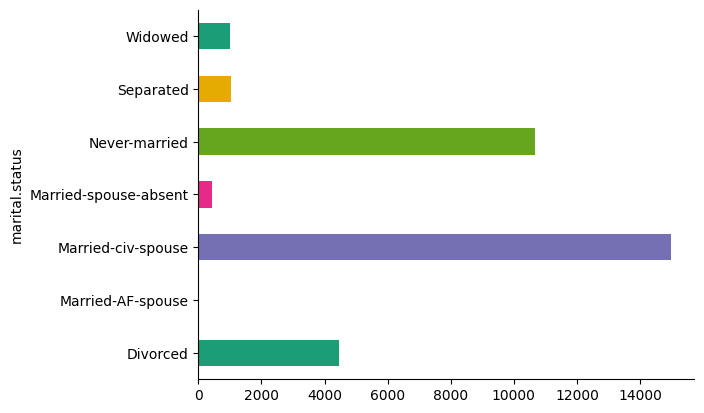

In [50]:
from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('marital.status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

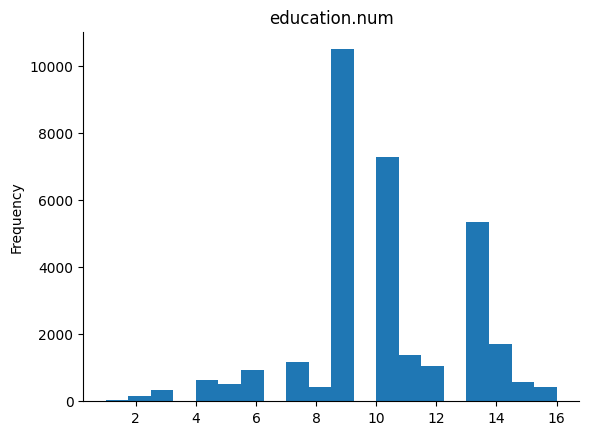

In [51]:
from matplotlib import pyplot as plt
data['education.num'].plot(kind='hist', bins=20, title='education.num')
plt.gca().spines[['top', 'right',]].set_visible(False)

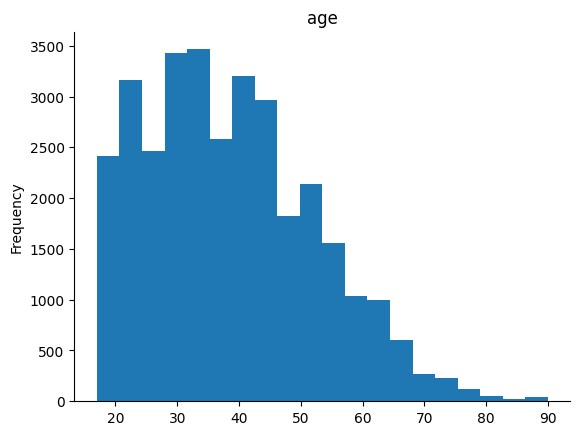

In [52]:
from matplotlib import pyplot as plt
data['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)



Al fine di valutare la qualità del dataset, si è fatto uso di due metodi molto generali: "describe()" e "info()". Il primo fornisce una sintesi statistica del dataset, il secondo invece fornisce informazioni sulla tipologia di dati che costituisce il datase, utile per individuare la presenza di valori mancanti.

In [53]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


E' possibile osservare che nessuna istanza contiene valori di feature nulli.

## Data Cleaning and Preparation

In questa sezione eseguiremo alcune operazioni preliminarie ma molto significative, quali cleaning, trasformazioni e altro, se necessarie, in modo da rendere il dataset significativo per l'esecuzione dei modelli.

### Gestire dati mancanti

In [55]:
nulls = data.isnull()
nulls.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


Sembra non esserci alcun dato mancante quindi possiamo saltare la parte di filtraggio delle corrispettive istanze.

### Rimozione di istanze duplicate

Ci sono svariati motivi per cui un dataset possa contenere duplicati, ad esempio se è ottenuto attraverso il marging di più dataset.   
A tal proposito si fa uso del metodo "duplicated()" di Pandas che restituisce true per un'istanza se è un duplicato di un'altra istanza, cioè se esiste un'altra istanza con diverso indice tale per cui ogni valore per colonna risulta essere uguale.

In [56]:
duplicated = data.duplicated() # return a mask
duplicated.describe()

# Visualizzo eventualmente le istanze duplicate
#duplicate_rows = data[duplicated]
#print(duplicate_rows)

count     32561
unique        2
top       False
freq      32537
dtype: object

Notiamo che 32537/32561 istanze hanno valore False, ciò significa che 24 istanze sono duplicate. Procediamo con la rimozione di queste.

In [57]:
new_data = data.drop_duplicates()
duplicated = new_data.duplicated()
duplicated.describe()

count     32537
unique        1
top       False
freq      32537
dtype: object

Notiamo che a questo punto ogni istanza ha valore a True.

#### Trasformazione del dataset

Ci vogliamo assicurare che i valori delle feature categoriche siano effettivamente quelli presenti nelle varie istanze, evitando situazioni di inconsistenza dovute a lettere minuscole o maiuscole, spazi o altro.   
Ovviamente come riferimento si considerano le informazioni fornite da coloro che hanno caricato il dataset.  
Si visualizza in prima battuta tutte le distribuzioni delle feature categoriche.

In [72]:
import plotly.express as px

# Selezione di tutte le colonne categoriche
feature_categoriche = new_data.select_dtypes(include=['object'])


def plot_categorical_distributions_plotly(df, categorical_columns):
    for col in categorical_columns:
        value_counts = df[col].value_counts().reset_index()
        value_counts.columns = ['Categoria', 'Frequenza']  # Rinomina le colonne

        fig = px.bar(value_counts, x='Categoria', y='Frequenza', title=f'Distribuzione di {col}')
        fig.update_layout(xaxis_title='Categoria', yaxis_title='Frequenza')
        fig.show()

plot_categorical_distributions_plotly(new_data, feature_categoriche)

Si può osservare come il carattere speciale "?" venga usato per indicare un valore mancante. Visualizziamo il numero di tuple contenente questo carattere.

In [104]:
# Genero la maschera
contains_question = new_data.applymap(lambda x: x == "?")

# Conto il numero di righe che contengono almeno un "?"
num_tuples_with_question_mark = contains_question.any(axis=1).sum()

print(num_tuples_with_question_mark)

0


A questo punto è possibile o procedere con la rimozione delle istanze oppure con la sostituzione dei valori "?". Dal momento che il numero di istanze è relativamente basso, si è deciso di rimuoverle dal dataset.

In [105]:
cleaned_data = new_data[~contains_question.any(axis=1)]

contains_question = cleaned_data.applymap(lambda x: x == "?")
num_tuples_with_question_mark = contains_question.any(axis=1).sum()

new_data = cleaned_data

print(num_tuples_with_question_mark)

0


### Permutazioni e campionamento casuale

In generale, i dataset possono essere caratterizzati da un ordinamento ben preciso, e questo comporta errori nella regressione o classificazione. Per risolvere questa problematica si effettua una permutazione delle tuple.

In [108]:
new_data = new_data.sample(new_data.shape[0])

## One Hot Encoding

Per la gestione delle variabili categoriche si è deciso di fare uso di un one-hot encoding. Altre strategie che richiedono l'assegnamento di una sequenza di interi alle varie categorie risultano essere poco ottimali dal momento che stabiliscono un ordinamento tra le varie categorie, un'operazione priva di senso nel nostro caso.

In [114]:
categorical_columns = new_data.select_dtypes(include=['object']).columns
new_data = pd.get_dummies(new_data, columns=categorical_columns)

new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30139 entries, 9388 to 5974
Columns: 106 entries, age to income_>50K
dtypes: bool(100), int64(6)
memory usage: 5.5 MB
